In [1]:
from keras import models
from keras import layers


Using TensorFlow backend.


In [2]:
model  = models.Sequential()
#卷积层，参数意义分别为：
#经过这一层之后，特征图的个数，一个卷积核，产生一个特征图，第一层：32，说明有32个卷积核；第二层64，说明在第一层的特征图基础上，每张特征图有两个卷积核进行特征采集
#卷积核大小
#激活函数
#输入大小（只在开始的第一层有，后面不需要）
model.add(layers.Conv2D(32,(3,3),activation='relu',input_shape=(150,150,3)))
model.add(layers.MaxPool2D(2,2))
model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())     #讲数据展开成1维
model.add(layers.Dropout(0.5))  #dropout使一半的神经元不工作
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.summary()                  #查看模型整体情况


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 15, 15, 128)      

In [3]:
#配置模型的损失函数、优化器、指标名称
from keras import optimizers
model.compile(loss='binary_crossentropy',          #损失函数
optimizer=optimizers.RMSprop(lr=1e-4),             #优化器
metrics=['acc'])                                   #指标名称


In [4]:
#图片的训练路径和验证路径
train_dir = r'F:\dogs-vs-cats\数据集\train'
validation_dir = r'F:\dogs-vs-cats\数据集\validation'


In [12]:
#生成训练需要的图片和标签
from keras.preprocessing.image import ImageDataGenerator
#将图片大小调整到1以内，原先图片每个像素的格式为uint8，所以要除以255
train_datagen = ImageDataGenerator(
rescale=1./255,
rotation_range=40,                #角度随机旋转的范围
width_shift_range=0.2,            #随机水平方向移动的范围（相对）
height_shift_range=0.2,           #随机垂直方向移动的范围（相对）
shear_range=0.2,                  #错切变换，即矩形变平行四边形  https://blog.csdn.net/ghy_111/article/details/78056441
zoom_range=0.2,                   #图像随机缩放的范围
horizontal_flip=True,)            #一半的图片是经过水平翻转的



validation_datagen = ImageDataGenerator(rescale=1./255)

#根据目录的名称，生成对应的标签
#train_dir有Ⅱ型和Ⅲ型的图片
#每次生成batch_size数量的图片，图片大小为target_size
train_generator = train_datagen.flow_from_directory(
train_dir,
target_size=(150, 150),              #生成图片的大小
batch_size=32,                       #一次生成图片的数量
class_mode='binary')                 #图片标签的类型

validation_generator = validation_datagen.flow_from_directory(
validation_dir,
target_size=(150, 150),              #生成图片的大小
batch_size=32,                       #一次生成图片的数量
class_mode='binary')                 #图片标签的类型



Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [13]:
#开始训练
history = model.fit_generator(
train_generator,                           #通过生成器传入图片和标签
steps_per_epoch=100,                       #每轮要传入100次，即2000张图片进行训练
epochs=30,                                 #总共训练30轮
validation_data=validation_generator,      #通过生成器传入图片和标签进行验证
validation_steps=50)                       #每轮要传入50次，即1000张图片进行验证

Epoch 1/30
100/100 [==============================] - 22s 223ms/step - loss: 0.4298 - acc: 0.7936 - val_loss: 0.4782 - val_acc: 0.7627

In [7]:
model.save('cats_and_dogs_small_2.h5')

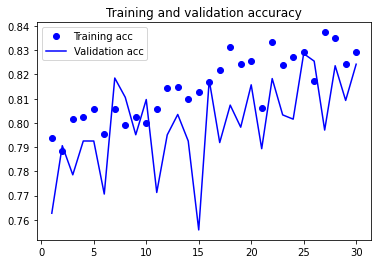

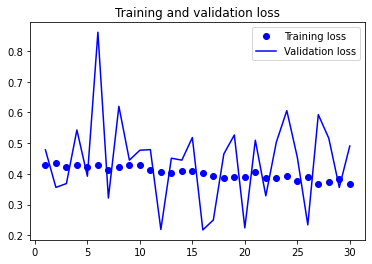

In [14]:
%matplotlib inline
#绘制训练精度、验证精度
#绘制训练损失、验证损失
#python画图库，类似matlab的plot
import matplotlib.pyplot as plt
acc = history.history['acc']             #得到训练的指标数据
val_acc = history.history['val_acc']     #得到验证的指标数据
loss = history.history['loss']           #得到训练损失
val_loss = history.history['val_loss']   #得到验证损失
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()                              #画图例
plt.figure()                              #另一张图
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()                                #画图，最后加上

